<a href="https://colab.research.google.com/github/MadhumithaThota/Twitter-FakeAccountDetection/blob/main/QCNN%20for%20Disease%20Detection/QCNN_for_Pneumonia_Detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Convolutional Neural Network

This tutorial implements a simplified <a href="https://www.nature.com/articles/s41567-019-0648-8" class="external">Quantum Convolutional Neural Network</a> (QCNN), a proposed quantum analogue to a classical convolutional neural network that is also *translationally invariant*.

This example demonstrates how to detect certain properties of a quantum data source, such as a quantum sensor or a complex simulation from a device. The quantum data source being a <a href="https://arxiv.org/pdf/quant-ph/0504097.pdf" class="external">cluster state</a> that may or may not have an excitation—what the QCNN will learn to detect (The dataset used in the paper was SPT phase classification).

## Setup

In [8]:
pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:

Install TensorFlow Quantum:

In [7]:
!pip install tensorflow-quantum==0.7.2

ERROR: Could not find a version that satisfies the requirement tensorflow-quantum==0.7.2 (from versions: 0.7.3)
ERROR: No matching distribution found for tensorflow-quantum==0.7.2


In [3]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<ipython-input-3-b07882b7b3a0>:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import importlib, pkg_resources


<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [5]:
pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.1
    Uninstalling protobuf-5.29.1:
      Successfully uninstalled protobuf-5.29.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
pandas-gbq 0.24.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.11.0 which is incompatible.


Now import TensorFlow and the module dependencies:

In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [3]:
!pip show tensorflow



Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [4]:
!pip show tensorflow-quantum

Name: tensorflow-quantum
Version: 0.7.3
Summary: TensorFlow Quantum is a library for hybrid quantum-classical machine learning.
Home-page: https://github.com/tensorflow/quantum/
Author: Google Inc.
Author-email: no-reply@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: cirq-core, cirq-google, sympy
Required-by: 


In [5]:
!pip install protobuf==3.20.3


## 1. Build a QCNN

### 1.1 Assemble circuits in a TensorFlow graph

TensorFlow Quantum (TFQ) provides layer classes designed for in-graph circuit construction. One example is the `tfq.layers.AddCircuit` layer that inherits from `tf.keras.Layer`. This layer can either prepend or append to the input batch of circuits, as shown in the following figure.

<img src="https://github.com/tensorflow/quantum/blob/master/docs/tutorials/images/qcnn_1.png?raw=1" width="700">



## Load the Data from Kaggle

In [2]:
! pip install -q kaggle


In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhumitha734","key":"625e4e47e38dc3f014f1fab4d0fa9553"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
!mv kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!pip install opendatasets
!pip install pandas

In [11]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: madhumitha734
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [01:22<00:00, 29.8MB/s]


In [12]:

# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [13]:
# Generate data paths with labels
data_dir = '/content/chest-xray-pneumonia/chest_xray/train'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [14]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [15]:
# crobed image size
batch_size = 16
img_size = (1858 , 2090)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 4172 validated image filenames belonging to 2 classes.
Found 626 validated image filenames belonging to 2 classes.
Found 418 validated image filenames belonging to 2 classes.


In [16]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

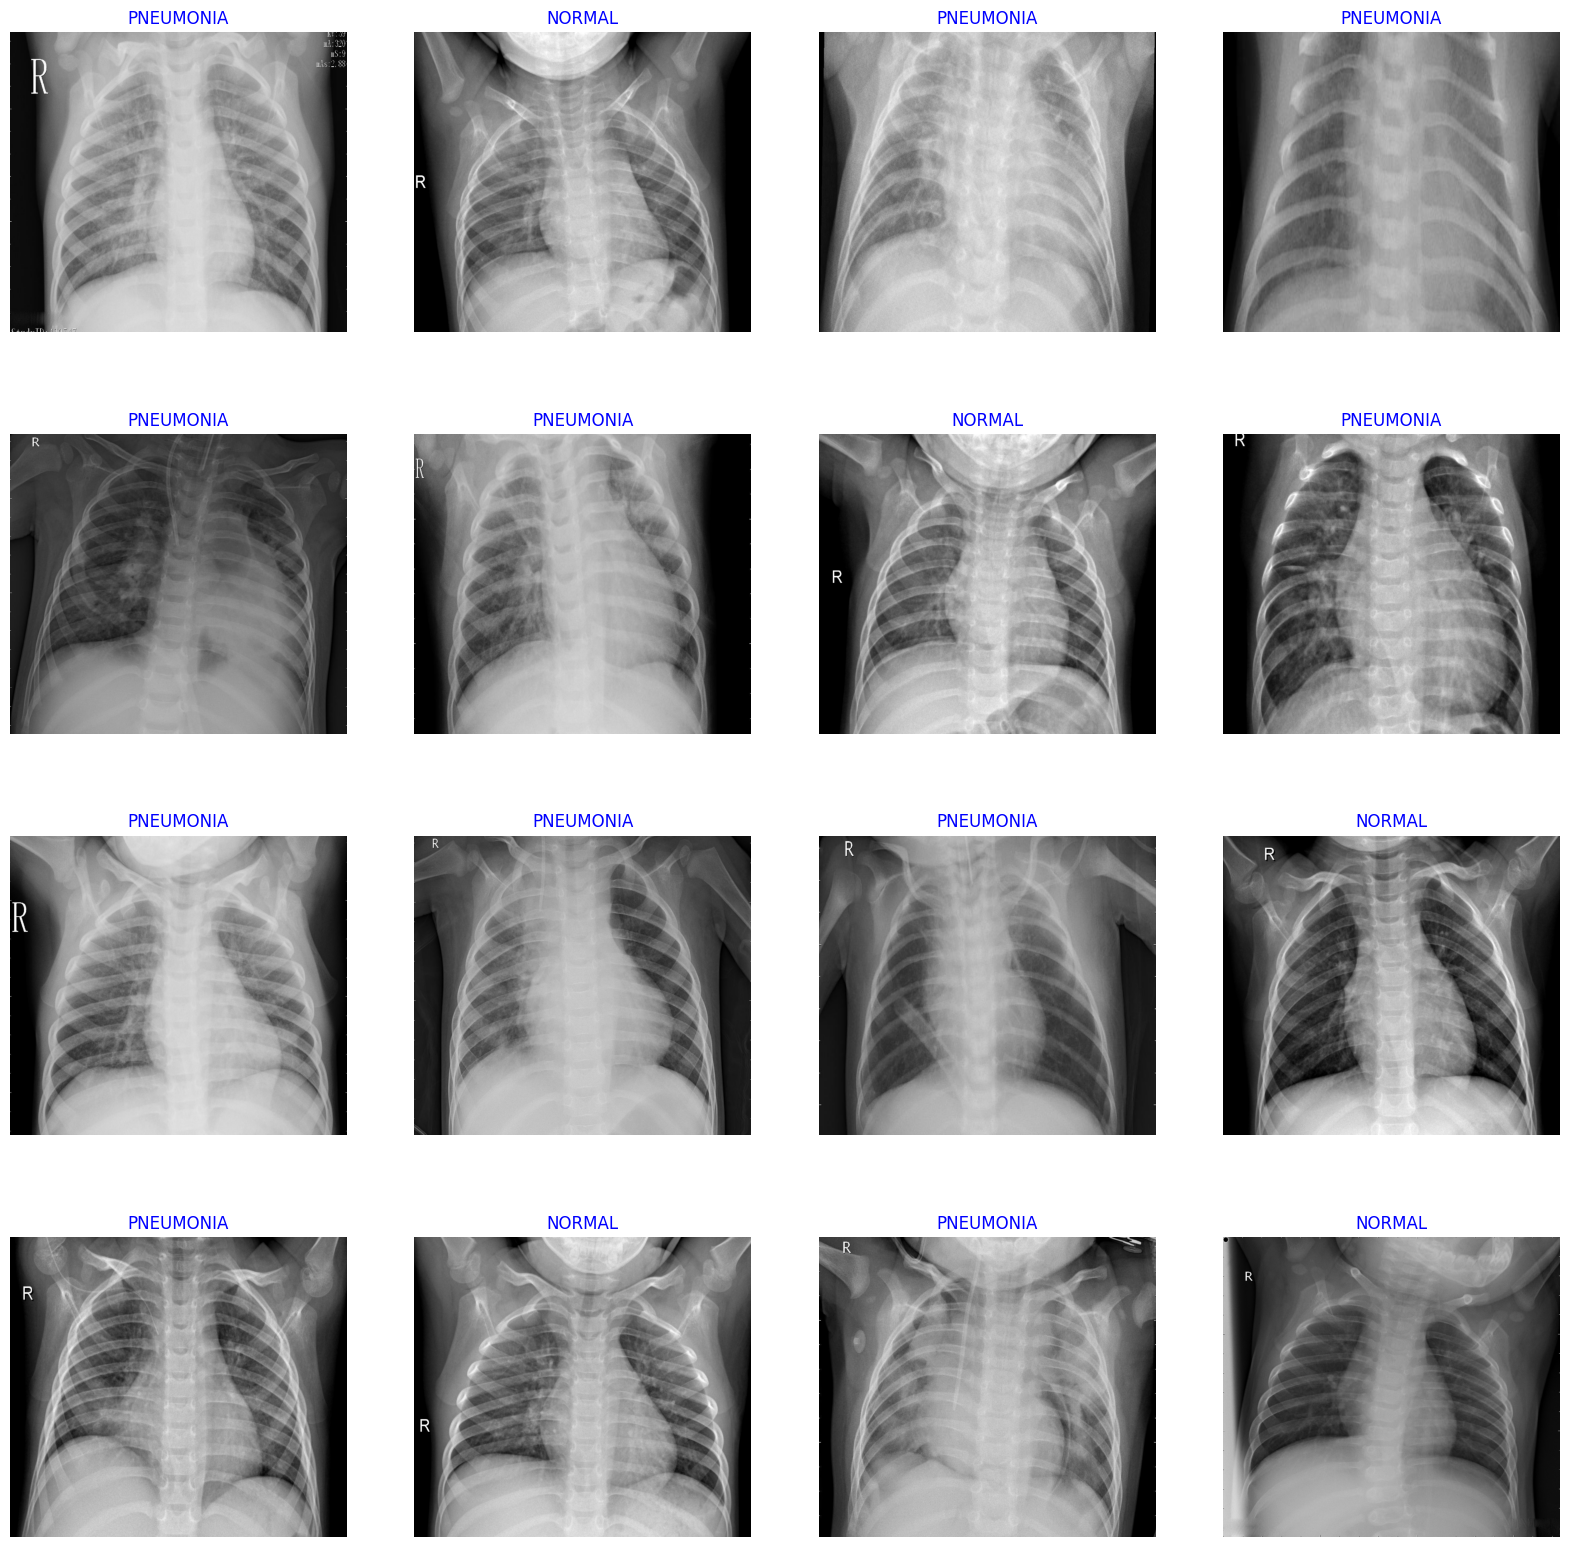

In [17]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [18]:
import numpy as np # linear algebra
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [19]:
#     return np.array(data)
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [20]:
train = get_training_data('/content/chest-xray-pneumonia/chest_xray/train')
val = get_training_data('/content/chest-xray-pneumonia/chest_xray/val')
test = get_training_data('/content/chest-xray-pneumonia/chest_xray/val')

Text(0.5, 1.0, 'NORMAL')

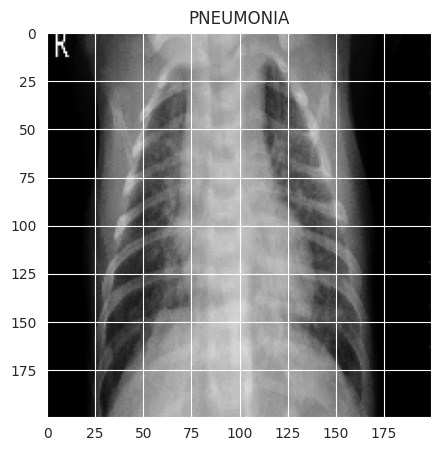

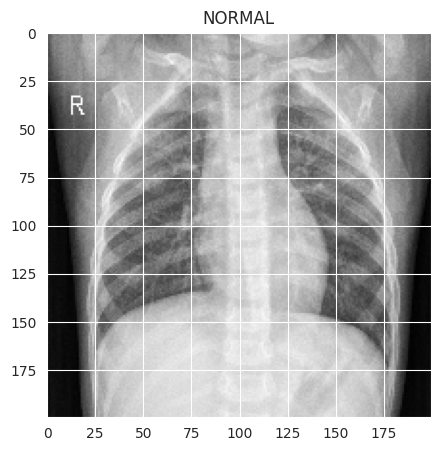

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(train[0][0], cmap = 'gray')
plt.title(labels[train[0][1]])

plt.figure(figsize=(5,5))
plt.imshow(train[-1][0], cmap = 'gray')
plt.title(labels[train[-1][1]])

In [22]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test =[]
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)


for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in train:
    x_test.append(feature)
    y_test.append(label)


In [23]:
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255
x_test = np.array(x_test)/255

In [24]:
x_train = x_train.reshape(-1,img_size,img_size,1)
y_train = np.array(y_train)
y_train
x_val = x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1,img_size,img_size,1)
y_test = np.array(y_test)

In [25]:
from tensorflow.keras import datasets, layers, models

import cirq
import sympy
import numpy as np
import collections

# visualization tools
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [26]:
x_train= tf.cast(x_train, tf.float32)
x_test=tf.cast(x_test, tf.float32)

x_train = tf.image.resize(x_train[:], (10,10)).numpy()
x_test = tf.image.resize(x_test[:], (10,10)).numpy()

y_train = y_train[:]
y_test = y_test[:]

0


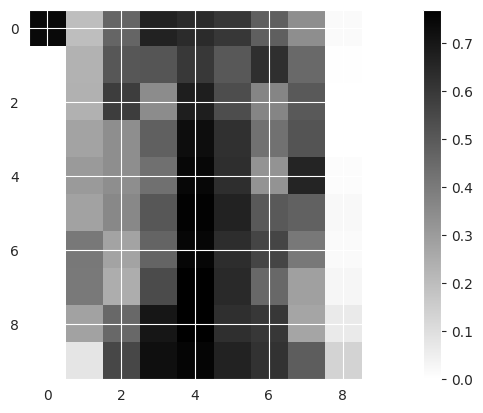

In [27]:
print(y_train[0])
fig = plt.figure()
plt.imshow(x_train[0, :, :, 0], cmap='gray_r')
plt.colorbar()
fig.savefig('sample', dpi=300)

In [28]:
width = np.shape(x_train)[1]
height = np.shape(x_train)[2]

fc_model = models.Sequential()

fc_model.add(layers.Flatten(input_shape=(width,height,1)))
fc_model.add(layers.Dense(32, activation='relu'))
fc_model.add(layers.Dense(10, activation='softmax'))

In [29]:
fc_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fc_history = fc_model.fit(x_train, y_train, steps_per_epoch=100,
                        validation_data=(x_test, y_test),
                        epochs=50, batch_size=5)

Epoch 1/50
100/100 [==============================] - 2s 15ms/step - loss: 0.9560 - accuracy: 0.6560 - val_loss: 0.5926 - val_accuracy: 0.7598
Epoch 2/50
100/100 [==============================] - 1s 15ms/step - loss: 0.5424 - accuracy: 0.7500 - val_loss: 0.5546 - val_accuracy: 0.7429
Epoch 3/50
100/100 [==============================] - 1s 15ms/step - loss: 0.5028 - accuracy: 0.7760 - val_loss: 0.4509 - val_accuracy: 0.7613
Epoch 4/50
100/100 [==============================] - 2s 21ms/step - loss: 0.4234 - accuracy: 0.8160 - val_loss: 0.4131 - val_accuracy: 0.7864
Epoch 5/50
100/100 [==============================] - 3s 28ms/step - loss: 0.4026 - accuracy: 0.8280 - val_loss: 0.3769 - val_accuracy: 0.8512
Epoch 6/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3523 - accuracy: 0.8460 - val_loss: 0.3524 - val_accuracy: 0.8737
Epoch 7/50
100/100 [==============================] - 1s 15ms/step - loss: 0.3304 - accuracy: 0.8600 - val_loss: 0.3327 - val_accuracy: 0.8562

In [31]:
width = np.shape(x_train)[1]
height = np.shape(x_train)[2]

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(8, (2, 2), activation='relu', input_shape=(width, height, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(16, (2, 2), activation='relu'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [32]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 8)           40        
                                                                 
 flatten_1 (Flatten)         (None, 648)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                20768     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 21138 (82.57 KB)
Trainable params: 21138 (82.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
cnn_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train, steps_per_epoch=100,
                        validation_data=(x_test, y_test),
                        epochs=50, batch_size=5)

Epoch 1/50
100/100 [==============================] - 2s 17ms/step - loss: 0.6765 - accuracy: 0.7380 - val_loss: 0.4417 - val_accuracy: 0.7535
Epoch 2/50
100/100 [==============================] - 3s 28ms/step - loss: 0.4120 - accuracy: 0.8040 - val_loss: 0.3358 - val_accuracy: 0.8825
Epoch 3/50
100/100 [==============================] - 2s 16ms/step - loss: 0.3126 - accuracy: 0.8900 - val_loss: 0.2691 - val_accuracy: 0.8942
Epoch 4/50
100/100 [==============================] - 3s 28ms/step - loss: 0.2747 - accuracy: 0.8820 - val_loss: 0.2466 - val_accuracy: 0.8930
Epoch 5/50
100/100 [==============================] - 1s 15ms/step - loss: 0.2527 - accuracy: 0.9040 - val_loss: 0.2287 - val_accuracy: 0.9034
Epoch 6/50
100/100 [==============================] - 1s 15ms/step - loss: 0.2470 - accuracy: 0.8980 - val_loss: 0.2764 - val_accuracy: 0.8721
Epoch 7/50
100/100 [==============================] - 1s 15ms/step - loss: 0.1809 - accuracy: 0.9200 - val_loss: 0.1931 - val_accuracy: 0.9266

In [34]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)

163/163 - 0s - loss: 0.1912 - accuracy: 0.9208 - 271ms/epoch - 2ms/step


In [35]:
class QConv(tf.keras.layers.Layer):
    def __init__(self, filter_size, depth, activation=None, name=None, kernel_regularizer=None, **kwangs):
        super(QConv, self).__init__(name=name, **kwangs)
        self.filter_size = filter_size
        self.depth = depth
        self.learning_params = []
        self.QCNN_layer_gen()
        # self.circuit_tensor = tfq.convert_to_tensor([self.circuit])
        self.activation = tf.keras.layers.Activation(activation)
        self.kernel_regularizer = kernel_regularizer

    def _next_qubit_set(self, original_size, next_size, qubits):
        step = original_size // next_size
        qubit_list = []
        for i in range(0, original_size, step):
            for j in range(0, original_size, step):
                qubit_list.append(qubits[original_size*i + j])
        return qubit_list

    def _get_new_param(self):
        """
        return new learnable parameter
        all returned parameter saved in self.learning_params
        """
        new_param = sympy.symbols("p"+str(len(self.learning_params)))
        self.learning_params.append(new_param)
        return new_param

    def _QConv(self, step, target, qubits):
        """
        apply learnable gates each quantum convolutional layer level
        """
        yield cirq.CZPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
        yield cirq.CXPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])

    def QCNN_layer_gen(self):
        """
        make quantum convolutional layer in QConv layer
        """
        pixels = self.filter_size**2
        # filter size: 2^n only for this version!
        if np.log2(pixels) % 1 != 0:
            raise NotImplementedError("filter size: 2^n only available")
        cirq_qubits = cirq.GridQubit.rect(self.filter_size, self.filter_size)
        # mapping input data to circuit
        input_circuit = cirq.Circuit()
        input_params = [sympy.symbols('a%d' %i) for i in range(pixels)]
        for i, qubit in enumerate(cirq_qubits):
            input_circuit.append(cirq.rx(np.pi*input_params[i])(qubit))
        # apply learnable gate set to QCNN circuit
        QCNN_circuit = cirq.Circuit()
        step_size = [2**i for i in range(np.log2(pixels).astype(np.int32))]
        for step in step_size:
            for target in range(0, pixels, 2*step):
                QCNN_circuit.append(self._QConv(step, target, cirq_qubits))
        # merge the circuits
        full_circuit = cirq.Circuit()
        full_circuit.append(input_circuit)
        full_circuit.append(QCNN_circuit)
        self.circuit = full_circuit # save circuit to the QCNN layer obj.
        self.params = input_params + self.learning_params
        self.op = cirq.Z(cirq_qubits[0])

    def build(self, input_shape):
        self.width = input_shape[1]
        self.height = input_shape[2]
        self.channel = input_shape[3]
        self.num_x = self.width - self.filter_size + 1
        self.num_y = self.height - self.filter_size + 1

        self.kernel = self.add_weight(name="kenel",
                                      shape=[self.depth,
                                             self.channel,
                                             len(self.learning_params)],
                                     initializer=tf.keras.initializers.glorot_normal(),
                                     regularizer=self.kernel_regularizer)
        self.circuit_tensor = tfq.convert_to_tensor([self.circuit] * self.num_x * self.num_y * self.channel)

    def call(self, inputs):
        # input shape: [N, width, height, channel]
        # slide and collect data
        stack_set = None
        for i in range(self.num_x):
            for j in range(self.num_y):
                slice_part = tf.slice(inputs, [0, i, j, 0], [-1, self.filter_size, self.filter_size, -1])
                slice_part = tf.reshape(slice_part, shape=[-1, 1, self.filter_size, self.filter_size, self.channel])
                if stack_set == None:
                    stack_set = slice_part
                else:
                    stack_set = tf.concat([stack_set, slice_part], 1)
        # -> shape: [N, num_x*num_y, filter_size, filter_size, channel]
        stack_set = tf.transpose(stack_set, perm=[0, 1, 4, 2, 3])
        # -> shape: [N, num_x*num_y, channel, filter_size, fiter_size]
        stack_set = tf.reshape(stack_set, shape=[-1, self.filter_size**2])
        # -> shape: [N*num_x*num_y*channel, filter_size^2]

        # total input citcuits: N * num_x * num_y * channel
        circuit_inputs = tf.tile([self.circuit_tensor], [tf.shape(inputs)[0], 1])
        circuit_inputs = tf.reshape(circuit_inputs, shape=[-1])
        tf.fill([tf.shape(inputs)[0]*self.num_x*self.num_y, 1], 1)
        outputs = []
        for i in range(self.depth):
            controller = tf.tile(self.kernel[i], [tf.shape(inputs)[0]*self.num_x*self.num_y, 1])
            outputs.append(self.single_depth_QCNN(stack_set, controller, circuit_inputs))
            # shape: [N, num_x, num_y]

        output_tensor = tf.stack(outputs, axis=3)
        output_tensor = tf.math.acos(tf.clip_by_value(output_tensor, -1+1e-5, 1-1e-5)) / np.pi
        # output_tensor = tf.clip_by_value(tf.math.acos(output_tensor)/np.pi, -1, 1)
        return self.activation(output_tensor)

    def single_depth_QCNN(self, input_data, controller, circuit_inputs):
        """
        make QCNN for 1 channel only
        """
        # input shape: [N*num_x*num_y*channel, filter_size^2]
        # controller shape: [N*num_x*num_y*channel, len(learning_params)]
        input_data = tf.concat([input_data, controller], 1)
        # input_data shape: [N*num_x*num_y*channel, len(learning_params)]
        QCNN_output = tfq.layers.Expectation()(circuit_inputs,
                                               symbol_names=self.params,
                                               symbol_values=input_data,
                                               operators=self.op)
        # QCNN_output shape: [N*num_x*num_y*channel]
        QCNN_output = tf.reshape(QCNN_output, shape=[-1, self.num_x, self.num_y, self.channel])
        return tf.math.reduce_sum(QCNN_output, 3)


In [36]:
width = np.shape(x_train)[1]
height = np.shape(x_train)[2]

qcnn_model = models.Sequential()


qcnn_model.add(QConv(filter_size=2, depth=8, activation='relu',
                     name='qconv1', input_shape=(width, height, 1)))
#model.add(layers.Conv2D(16, (2, 2), activation='relu'))
qcnn_model.add(layers.Flatten())
qcnn_model.add(layers.Dense(32, activation='relu'))
qcnn_model.add(layers.Dense(10, activation='softmax'))

In [37]:
qcnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 qconv1 (QConv)              (None, 9, 9, 8)           48        
                                                                 
 flatten_2 (Flatten)         (None, 648)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                20768     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 21146 (82.60 KB)
Trainable params: 21146 (82.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


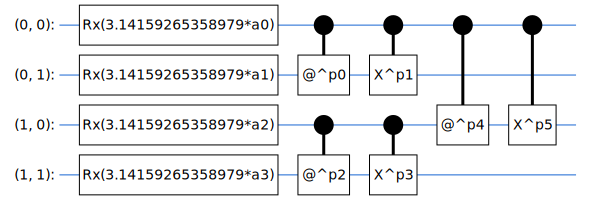

In [38]:
SVGCircuit(QConv(filter_size=2, depth=0, activation='relu').circuit)

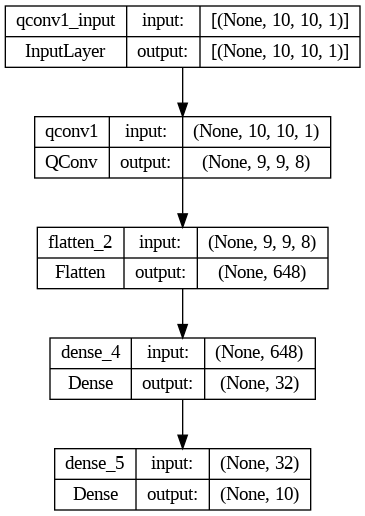

In [39]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

plot_model(qcnn_model, to_file='model_shapes.png', show_shapes=True)

In [40]:
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

qcnn_history = qcnn_model.fit(x_train, y_train, steps_per_epoch=100,
                        validation_data=(x_test, y_test),
                        epochs=10, batch_size=5)

Epoch 1/10
100/100 [==============================] - 325s 3s/step - loss: 0.8079 - accuracy: 0.7220 - val_loss: 0.5596 - val_accuracy: 0.7429
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.5257 - accuracy: 0.7420

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = qcnn_model.evaluate(x_test, y_test, verbose=2)

163/163 - 459s - loss: 0.2362 - accuracy: 0.9066 - 459s/epoch - 3s/step


In [ ]:
for i in range(8):
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(qcnn_model.get_layer('qconv1')(x_train[0:1,:,:,:])[0,:,:,i], cmap='gray_r')
    fig.savefig('qcnn_%d'%i, dpi=300, bbox_inches='tight')

In [ ]:
def plot_loss_curves(fc_loss, cnn_loss, qcnn_loss):
    fig = plt.figure()
    plt.plot(np.arange(len(fc_loss)) + 1, fc_loss, "go-", label="fully-connected")
    plt.plot(np.arange(len(cnn_loss)) + 1, cnn_loss, "rs-", label="CNN")
    plt.plot(np.arange(len(qcnn_loss)) + 1, qcnn_loss, "b^-", label="QCNN")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 50, 0, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Test set loss")
    plt.grid(True)
    fig.savefig('loss.png', dpi=300)

def plot_loss_curves_small(fc_loss, cnn_loss, qcnn_loss):
    fig = plt.figure()
    plt.plot(np.arange(len(fc_loss))[::2] + 1, fc_loss[::2], "go-", label="fully-connected")
    plt.plot(np.arange(len(cnn_loss))[::2] + 1, cnn_loss[::2], "rs-", label="CNN")
    plt.plot(np.arange(len(qcnn_loss))[::2] + 1, qcnn_loss[::2], "b^-", label="QCNN")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 50, 0, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Test set loss")
    plt.grid(True)
    fig.savefig('loss_small.png', dpi=300)

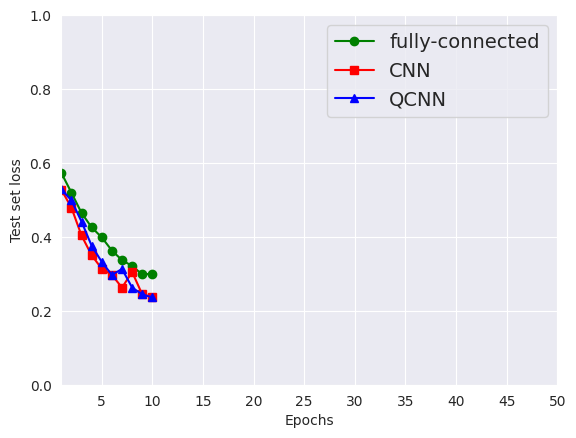

In [ ]:
plot_loss_curves(fc_history.history['val_loss'], cnn_history.history['val_loss'], qcnn_history.history['val_loss'])


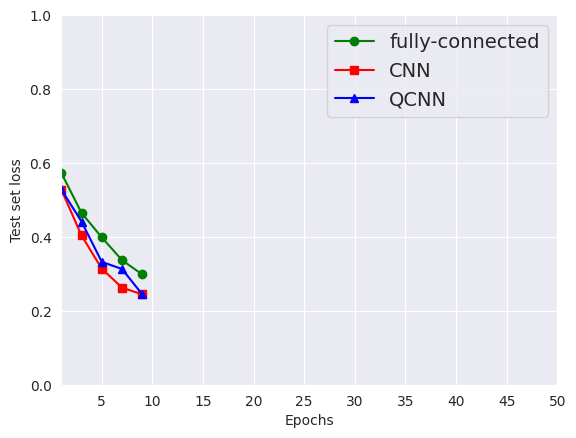

In [ ]:
plot_loss_curves_small(fc_history.history['val_loss'], cnn_history.history['val_loss'], qcnn_history.history['val_loss'])


In [ ]:
def plot_acc_curves(fc_acc, cnn_acc, qcnn_acc):
    fig = plt.figure()
    plt.plot(np.arange(len(fc_acc)) + 1, fc_acc, "go-", label="fully-connected")
    plt.plot(np.arange(len(cnn_acc)) + 1, cnn_acc, "rs-", label="CNN")
    plt.plot(np.arange(len(qcnn_acc)) + 1, qcnn_acc, "b^-", label="QCNN")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.grid()
    plt.axis([1, 50, 0.8, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Test set accuracy")
    fig.savefig('accuracy.png', dpi=300)

def plot_acc_curves_small(fc_acc, cnn_acc, qcnn_acc):
    fig = plt.figure()
    plt.plot(np.arange(len(fc_acc))[::2] + 1, fc_acc[::2], "go-", label="fully-connected")
    plt.plot(np.arange(len(cnn_acc))[::2] + 1, cnn_acc[::2], "rs-", label="CNN")
    plt.plot(np.arange(len(qcnn_acc))[::2] + 1, qcnn_acc[::2], "b^-", label="QCNN")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.grid()
    plt.axis([1, 50, 0.8, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Test set accuracy")
    fig.savefig('accuracy_small.png', dpi=300)

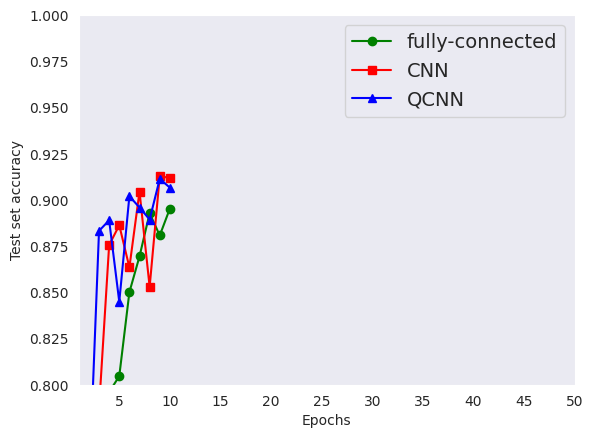

In [ ]:
plot_acc_curves(fc_history.history['val_accuracy'], cnn_history.history['val_accuracy'], qcnn_history.history['val_accuracy'])


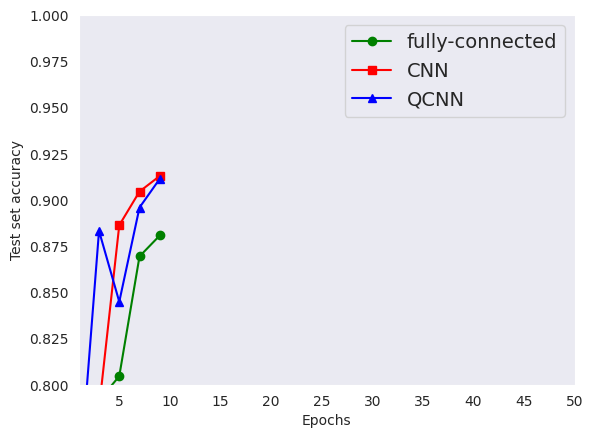

In [ ]:
plot_acc_curves_small(fc_history.history['val_accuracy'], cnn_history.history['val_accuracy'], qcnn_history.history['val_accuracy'])
